## What are the the most relevant aspects that characterise female art historians according to their country of birth,relations to institutions/employers, occupations, places of education?

The aim of this analysis is to dicorver the most relevant aspects among female art historians, in realtion also to men art historians to see if there are or not differences.

### Step 0 : number of female vs male art historian 

Starting the analysis obatining the number of female arthistorian and the number of male arthistorians in the world

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

total_query = """
SELECT ?woman ?womanLabel
WHERE
{
  BIND(wdt:P31 AS ?instanceOf).
  BIND(wd:Q5 AS ?human).
  BIND(wdt:P21 AS ?sexOrGender).
  BIND(wd:Q6581072 AS ?female).
  BIND(wdt:P106 AS ?occupation).
  BIND(wd:Q1792450 AS ?arthistorian).
  ?woman ?instanceOf ?human;
         ?sexOrGender ?female;
         ?occupation ?arthistorian.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
}
"""
#For users coming here in 2019, for errors in accessing Wikidata sparql endpoint, Wikidata enforces a strict User-Agent policy, see this archived (thanks Pere) Wikidata Project chat, which says that applications sending informative headers is indicative of well-behaved non-bot scripts, also see user-agent policy of Wikimedia.
#According to the documentation, we can set user-agent using the agent instance variable.
#The User-Agent request header is a characteristic string that lets servers and network peers identify the application, operating system, vendor, and/or version of the requesting user agent.
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(total_query)
sparql_wd.setReturnFormat(JSON)
totalResults = sparql_wd.query().convert()

In [3]:
import csv 
import pandas as pd
df = pd.read_csv("femalearthisto.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None) #pandas method for printing all the elements in a df 
print(df["woman"]) #print just the column related to the woman url

0           http://www.wikidata.org/entity/Q66462
1           http://www.wikidata.org/entity/Q88151
2          http://www.wikidata.org/entity/Q103766
3          http://www.wikidata.org/entity/Q108405
4          http://www.wikidata.org/entity/Q109944
5          http://www.wikidata.org/entity/Q112518
6          http://www.wikidata.org/entity/Q116536
7           http://www.wikidata.org/entity/Q92379
8           http://www.wikidata.org/entity/Q96140
9           http://www.wikidata.org/entity/Q97288
10          http://www.wikidata.org/entity/Q97309
11          http://www.wikidata.org/entity/Q97436
12          http://www.wikidata.org/entity/Q98089
13          http://www.wikidata.org/entity/Q98215
14          http://www.wikidata.org/entity/Q98225
15          http://www.wikidata.org/entity/Q99497
16         http://www.wikidata.org/entity/Q101216
17         http://www.wikidata.org/entity/Q122123
18         http://www.wikidata.org/entity/Q123131
19         http://www.wikidata.org/entity/Q137115


In [4]:
#we get the total number of female art historians
print('There are'+ ' ' + str(df[df.columns[0]].count()) +' ' + 'female art historians in the world')  
#df[df.columns[0]].count() is the pandas method for counting all the elements in the first row avoids counting NaN values in the first column

There are 4771 female art historians in the world


Now let's check the number of male art historians to check if there are differences in terms of numbers of people. 

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
man_query = """
SELECT ?man ?manLabel
WHERE
{
  BIND(wdt:P31 AS ?instanceOf).
  BIND(wd:Q5 AS ?human).
  BIND(wdt:P21 AS ?sexOrGender).
  BIND(wd:Q6581097 AS ?male).
  BIND(wdt:P106 AS ?occupation).
  BIND(wd:Q1792450 AS ?arthistorian).
  ?man ?instanceOf ?human;
         ?sexOrGender ?male;
         ?occupation ?arthistorian.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
}
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(man_query)
sparql_wd.setReturnFormat(JSON)
manResults = sparql_wd.query().convert()

In [5]:
import csv 
import pandas as pd
df = pd.read_csv("man_results.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None) #pandas method for printing all the elements in a df 
print(df["man"]) #print just the column related to the man url

0           http://www.wikidata.org/entity/Q102560
1           http://www.wikidata.org/entity/Q102730
2           http://www.wikidata.org/entity/Q102869
3           http://www.wikidata.org/entity/Q102913
4           http://www.wikidata.org/entity/Q102948
5           http://www.wikidata.org/entity/Q102971
6           http://www.wikidata.org/entity/Q103051
7           http://www.wikidata.org/entity/Q103240
8           http://www.wikidata.org/entity/Q103334
9           http://www.wikidata.org/entity/Q103338
10          http://www.wikidata.org/entity/Q103424
11          http://www.wikidata.org/entity/Q103568
12          http://www.wikidata.org/entity/Q103586
13          http://www.wikidata.org/entity/Q103590
14          http://www.wikidata.org/entity/Q103704
15          http://www.wikidata.org/entity/Q103743
16          http://www.wikidata.org/entity/Q103967
17          http://www.wikidata.org/entity/Q104324
18          http://www.wikidata.org/entity/Q104327
19          http://www.wikidata

In [6]:
#we get the total number of female art historians
print('There are'+ ' ' + str(df[df.columns[0]].count()) +' ' + 'male art historians in the world')  
#df[df.columns[0]].count() is the pandas method for counting all the elements in the first row avoids counting NaN values in the first column

There are 10022 male art historians in the world


So as we can see there is a first difference in terms of number of art historians.
We can see better the numerical difference trough a pie chart using bokeh. 

In [69]:
# importing the modules
from math import pi

import pandas as pd

from bokeh.io import output_notebook, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
  
# file to save the model 
output_file 
           
# instantiating the figure object 
graph = figure(title = "Total number of female and male art historians in the world") 
  
# name of the sectors
sectors = ["Female", "Male"]

#calculate the percentages 
#tot = 10022 + 4771  = 14793
#percentage of female = 4771/14793*100 = 32.25
#percentages of male = 100-32,25 = 67.75

# % tage weightage of the sectors
percentages = [32.25, 67.75]
  
# converting into radians
radians = [math.radians((percent / 100) * 360) for percent in percentages]
  
# starting angle values
start_angle = [math.radians(0)]
prev = start_angle[0]
for i in radians[:-1]:
    start_angle.append(i + prev)
    prev = i + prev
  
# ending angle values
end_angle = start_angle[1:] + [math.radians(0)]
  
# center of the pie chart
x = 0
y = 0
  
# radius of the glyphs
radius = 1
  
# color of the wedges
color = ["violet", "yellow"]
  
# plotting the graph
for i in range(len(sectors)):
    graph.wedge(x, y, radius,
                start_angle = start_angle[i],
                end_angle = end_angle[i],
                color = color[i],
                legend_label = sectors[i])
  
# displaying the graph
show(graph)

In [35]:
#TROVA IL MODO DI SALVERE IL FILE QUA

NameError: name 'obj' is not defined

### Number of female vs male art historians per birthplace

In [71]:
birthplacefem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P19 ?placeofbirth.
       
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel
ORDER BY DESC(?totwomen)

"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(birthplacefem_query)
sparql_wd.setReturnFormat(JSON)
femaleResults = sparql_wd.query().convert()

### Number of female vs male art historians per country

In [10]:
#in the query country code is used because a lot of records were the same but under different names (ex. Italy and Kingdom of Italy, for avoding this)
country_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?country.
       
       ?country wdt:P297 ?countryCode.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totwomen)
"""

sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(country_query)
sparql_wd.setReturnFormat(JSON)
femaleResults = sparql_wd.query().convert()


In [11]:
for result in femaleResults["results"]["bindings"]:
    country_label = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + "female art historian in " + country_label)
    else:
        print("There are "+ totaln + " " + "female art historians in " + country_label)
    

There are 473 female art historians in Germany
There are 361 female art historians in United States of America
There are 202 female art historians in France
There are 160 female art historians in Italy
There are 154 female art historians in Spain
There are 136 female art historians in Slovenia
There are 123 female art historians in Poland
There are 111 female art historians in United Kingdom
There are 103 female art historians in Austria
There are 80 female art historians in Russia
There are 74 female art historians in Kingdom of the Netherlands
There are 71 female art historians in Czech Republic
There are 60 female art historians in Switzerland
There are 58 female art historians in Hungary
There are 57 female art historians in Norway
There are 56 female art historians in Canada
There are 54 female art historians in Sweden
There are 52 female art historians in Denmark
There are 42 female art historians in Estonia
There are 29 female art historians in Japan
There are 29 female art hist

In [12]:
import pandas as pd
import csv
df = pd.read_csv("country_fem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode                countryLabel  totwomen
0           DE                     Germany       473
1           US    United States of America       360
2           FR                      France       201
3           IT                       Italy       160
4           ES                       Spain       152
5           SI                    Slovenia       136
6           PL                      Poland       122
7           GB              United Kingdom       111
8           AT                     Austria       103
9           RU                      Russia        80
10          NL  Kingdom of the Netherlands        74
11          CZ              Czech Republic        71
12          CH                 Switzerland        60
13          HU                     Hungary        58
14          NO                      Norway        57
15          CA                      Canada        56
16          SE                      Sweden        54
17          DK                     Denmark    

In [14]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countryfem_dict = {}
countryfem_list = df[0:18]
countryfem_dict = countryfem_list.set_index('countryCode').T.to_dict('list') 
print(countryfem_dict)

{'DE': ['Germany', 473], 'US': ['United States of America', 360], 'FR': ['France', 201], 'IT': ['Italy', 160], 'ES': ['Spain', 152], 'SI': ['Slovenia', 136], 'PL': ['Poland', 122], 'GB': ['United Kingdom', 111], 'AT': ['Austria', 103], 'RU': ['Russia', 80], 'NL': ['Kingdom of the Netherlands', 74], 'CZ': ['Czech Republic', 71], 'CH': ['Switzerland', 60], 'HU': ['Hungary', 58], 'NO': ['Norway', 57], 'CA': ['Canada', 56], 'SE': ['Sweden', 54], 'DK': ['Denmark', 52]}


Plotting the results trough a pie chart using matplotlib

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-15-1c84d3045002>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


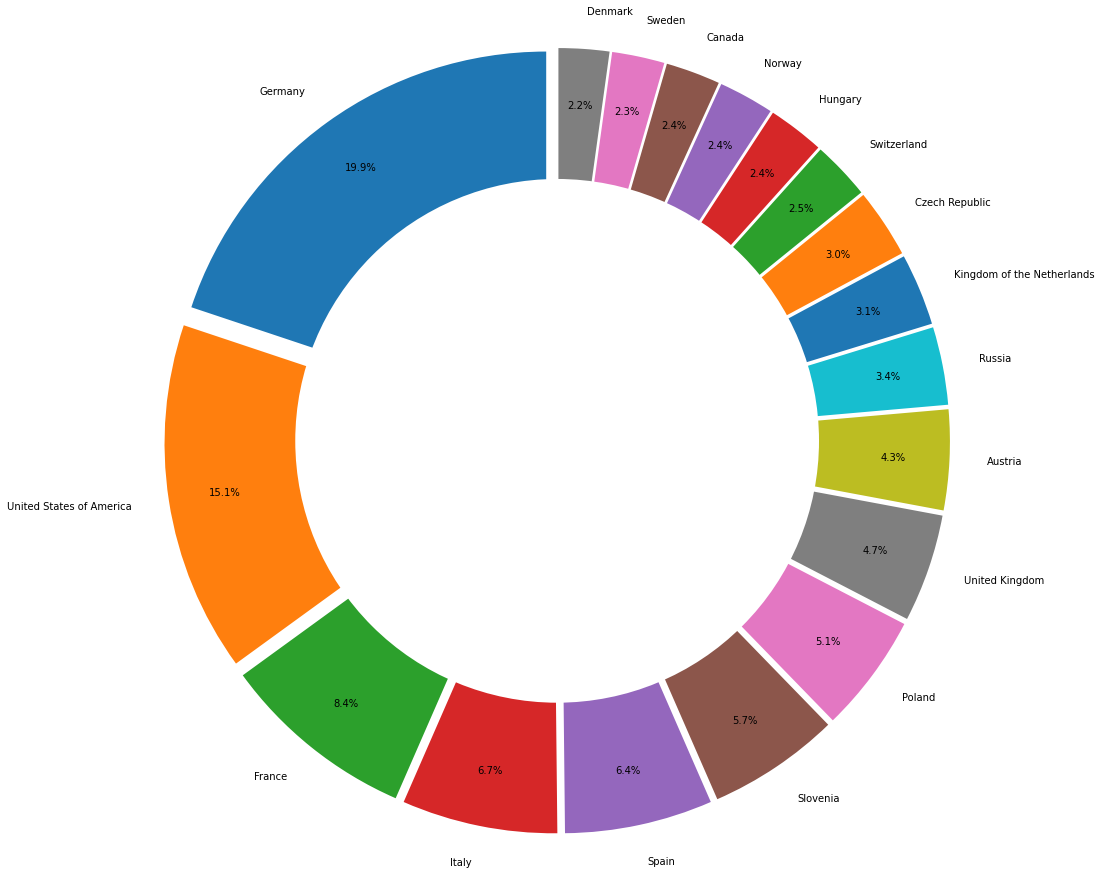

In [15]:
l = len(countryfem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countryfem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

As we can see the majority of female art historians came from Germany, United States of America, France and then Italy. 

### Number of male art historians per country

We repeat the same procedure with male art historians 

In [47]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
countrymen_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?country.
       
       ?country wdt:P297 ?countryCode.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(countrymen_query)
sparql_wd.setReturnFormat(JSON)
maleResults = sparql_wd.query().convert()

In [48]:
for result in maleResults["results"]["bindings"]:
    country_label = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + "male art historian in " + country_label)
    else:
        print("There are "+ totaln + " " + "male art historians in " + country_label)

There are 1888 male art historians in Germany
There are 773 male art historians in France
There are 595 male art historians in United States of America
There are 390 male art historians in United Kingdom
There are 364 male art historians in Italy
There are 340 male art historians in Austria
There are 260 male art historians in Poland
There are 241 male art historians in Spain
There are 216 male art historians in Switzerland
There are 194 male art historians in Kingdom of the Netherlands
There are 167 male art historians in Japan
There are 160 male art historians in Hungary
There are 147 male art historians in Sweden
There are 126 male art historians in Czech Republic
There are 123 male art historians in Belgium
There are 104 male art historians in Denmark
There are 102 male art historians in Slovenia
There are 102 male art historians in Russia
There are 95 male art historians in Norway
There are 70 male art historians in Canada
There are 45 male art historians in Greece
There are 45 ma

In [18]:
import pandas as pd
import csv
df = pd.read_csv("country_men.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode                countryLabel  totmen
0           DE                     Germany    1888
1           FR                      France     772
2           US    United States of America     595
3           GB              United Kingdom     390
4           IT                       Italy     364
5           AT                     Austria     340
6           PL                      Poland     260
7           ES                       Spain     241
8           CH                 Switzerland     216
9           NL  Kingdom of the Netherlands     194
10          JP                       Japan     167
11          HU                     Hungary     160
12          SE                      Sweden     147
13          CZ              Czech Republic     126
14          BE                     Belgium     123
15          DK                     Denmark     104
16          SI                    Slovenia     102
17          RU                      Russia     102
18          NO                 

In [19]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countrymale_dict = {}
countrymale_list = df[0:18]
countrymale_dict = countrymale_list.set_index('countryCode').T.to_dict('list') 
print(countrymale_dict)

{'DE': ['Germany', 1888], 'FR': ['France', 772], 'US': ['United States of America', 595], 'GB': ['United Kingdom', 390], 'IT': ['Italy', 364], 'AT': ['Austria', 340], 'PL': ['Poland', 260], 'ES': ['Spain', 241], 'CH': ['Switzerland', 216], 'NL': ['Kingdom of the Netherlands', 194], 'JP': ['Japan', 167], 'HU': ['Hungary', 160], 'SE': ['Sweden', 147], 'CZ': ['Czech Republic', 126], 'BE': ['Belgium', 123], 'DK': ['Denmark', 104], 'SI': ['Slovenia', 102], 'RU': ['Russia', 102]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-20-e3dcefd5d1a1>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


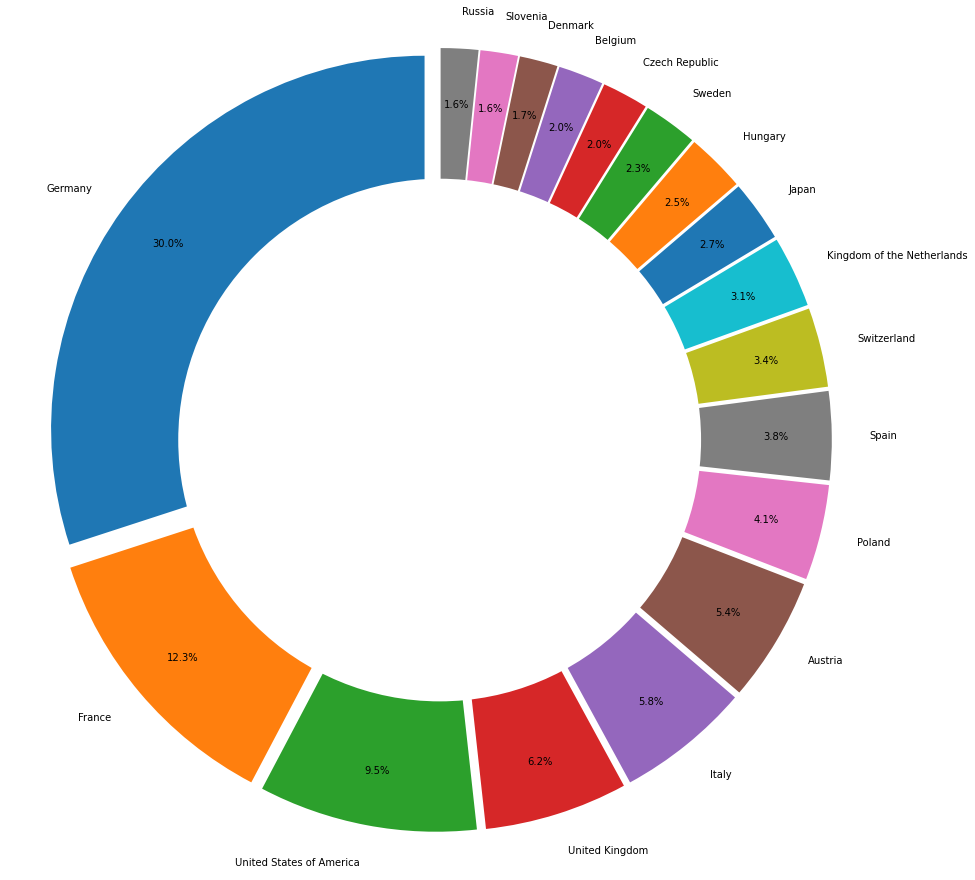

In [20]:
l = len(countrymale_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countrymale_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Also here the majority of male art historians (as for the women) came from Germany. But then there ia another difference: then we have France, United States of America, United Kingdom and then Italy. We can compare the 2 graphs:

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<Figure size 432x288 with 0 Axes>

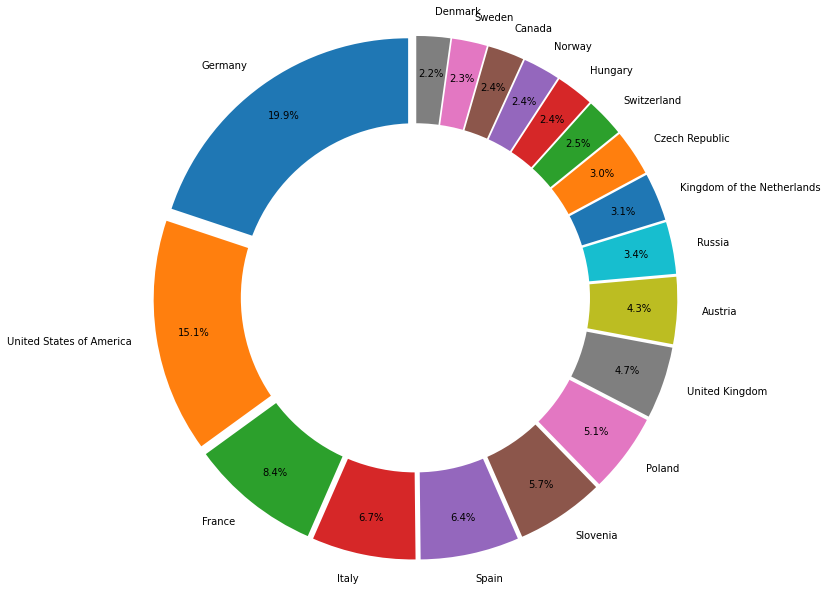

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


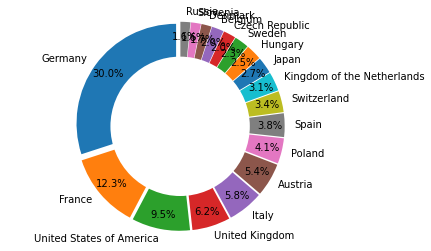

In [29]:
import matplotlib.pyplot as plt

plt.figure(0)
l = len(countryfem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countryfem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')



plt.show()

plt.figure(1)
l = len(countrymale_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(40,40))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countrymale_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')



plt.show()



In [58]:
#merge the 2 dictionaries coutryfem_dict and countrymale_dict

{'DE': ['Germany', 1888],
 'US': ['United States of America', 595],
 'FR': ['France', 772],
 'IT': ['Italy', 364],
 'ES': ['Spain', 241],
 'SI': ['Slovenia', 102],
 'PL': ['Poland', 260],
 'GB': ['United Kingdom', 390],
 'AT': ['Austria', 340],
 'RU': ['Russia', 102],
 'NL': ['Kingdom of the Netherlands', 194],
 'CZ': ['Czech Republic', 126],
 'CH': ['Switzerland', 216],
 'HU': ['Hungary', 160],
 'NO': ['Norway', 57],
 'CA': ['Canada', 56],
 'SE': ['Sweden', 147],
 'DK': ['Denmark', 104],
 'JP': ['Japan', 167],
 'BE': ['Belgium', 123]}

### Number of female art historians per occupations

In [30]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
occupationResult = """
SELECT DISTINCT ?occupationLabel (COUNT(?woman) AS ?totwoman)
WHERE
{
       ?woman wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581072 ;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totwoman)

""" 

sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(occupationResult)
sparql_wd.setReturnFormat(JSON)
femaleResults = sparql_wd.query().convert()

In [65]:
import pandas as pd
import csv
df = pd.read_csv("occupation.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


                       occupationLabel  totwoman
0                        art historian      4818
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                  

In [66]:
datawoman = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datawoman)


                       occupationLabel  totwoman
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                           architect        55
20                  

In [38]:
#among the results we decide to take the first most significan 10, in order to graph to them 
#DataFrame as a Dictionary, access its columns using the indexing [] notation
#iloc is a pandas method for specific operators for rows/columns selection, odataframe.iloc[where_i,where_j]
#index-based selection, i.e. select rows and columns by integer position
#where_i is the row number (: otherwise), where_j is the column number (can be omitted).
occupationwomen = df.iloc[1:11] 
print(occupationwomen)

            occupationLabel  totwoman
1        university teacher       405
2                 historian       404
3        exhibition curator       383
4                   curator       340
5                    writer       337
6             archaeologist       181
7   architectural historian       159
8                art critic       149
9                journalist       131
10               translator       109


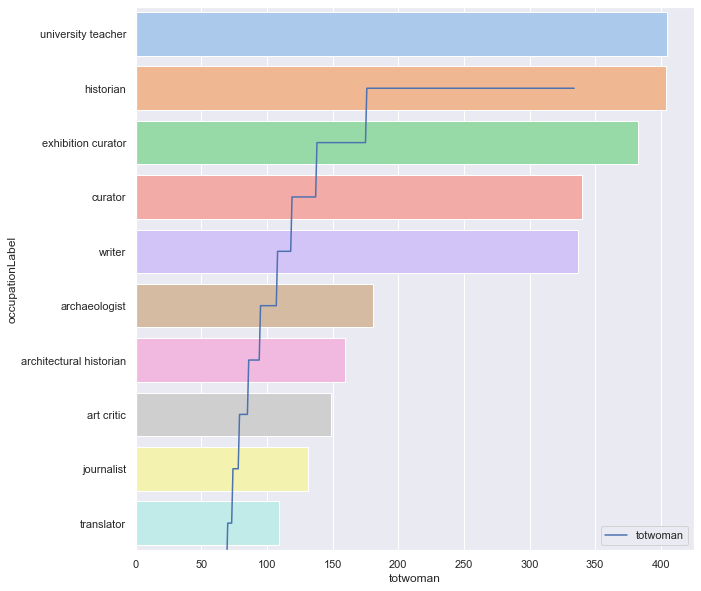

In [41]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totwoman", palette="pastel", data= occupationwomen)

### Number of men per occupation

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
occupationmen_query = """
SELECT DISTINCT ?occupationLabel (COUNT(?woman) AS ?totmen)
WHERE
{
       ?woman wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581097 ;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(occupationmen_query)
sparql_wd.setReturnFormat(JSON)
maleResults = sparql_wd.query().convert()

In [67]:
import pandas as pd
import csv
df = pd.read_csv("occupationmale_query.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

                                       occupationLabel  totmen
0                                        art historian   10258
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director 

In [68]:
datamen = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datamen)

                                       occupationLabel  totmen
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director     261
15                                                poet 

In [44]:
occupationmen = df.iloc[1:11] 
print(occupationmen)

            occupationLabel  totmen
1        university teacher    1785
2             archaeologist    1091
3                 historian    1013
4                    writer     999
5   architectural historian     765
6                   painter     603
7                 architect     556
8                   curator     510
9                art critic     461
10       exhibition curator     422


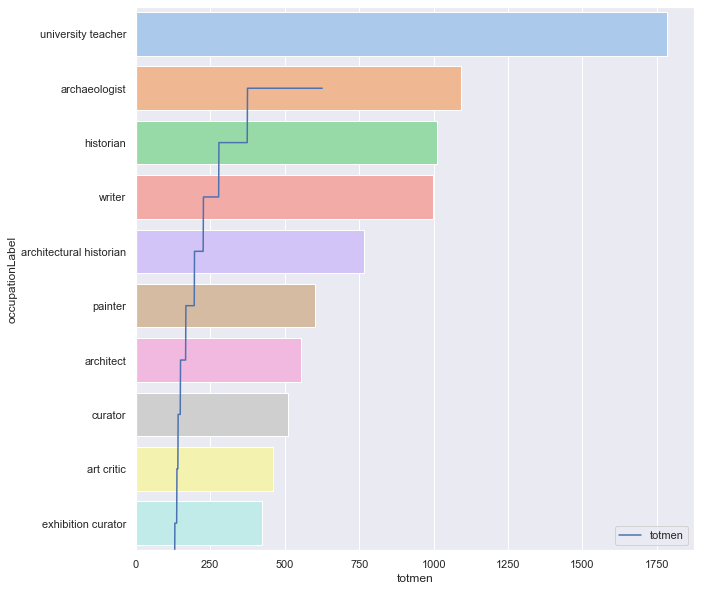

In [46]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totmen", palette="pastel", data= occupationmen)

As we can see also here there are differences. 

In [ ]:
occupationwomen = pd.Dataframe

### Number of woman art historian per institute

In [59]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

institute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totwomen)
"""

sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(institute_query)
sparql_wd.setReturnFormat(JSON)
TotalResults = sparql_wd.query().convert()
artinstitute = {}
for result in TotalResults["results"]["bindings"]:
    institution = result["institutionLabel"]["value"]
    women = result["totwomen"]["value"]
    artinstitute[institution] = [women]
    
print(artinstitute)
#for result in artinstitute
    
    #for k,v in artinstitue:
     #   women = result["totwomen"]["value"]
      #  artistitute.append(int[women])
       # print(artinstitue)

{'German Archaeological Institute': ['48'], 'American Academy of Arts and Sciences': ['18'], 'Academia Europaea': ['13'], 'Royal Swedish Academy of Letters, History and Antiquities': ['12'], 'Medieval Academy of America': ['10'], 'British Academy': ['8'], 'Real Academia de Bellas Artes de San Fernando': ['7'], 'Mommsen Society': ['6'], 'Verband Deutscher Kunsthistoriker': ['6'], 'College Art Association': ['6'], 'Austrian Academy of Sciences': ['5'], 'Accademia di San Luca': ['5'], 'Society of Antiquaries of London': ['5'], 'Reial Acadèmia Catalana de Belles Arts de Sant Jordi': ['5'], 'Norwegian Academy of Science and Letters': ['5'], 'National Union of Artists of Ukraine': ['5'], 'Royal Netherlands Academy of Arts and Sciences': ['4'], 'Austrian Archaeological Institute': ['4'], 'Lincean Academy': ['4'], 'American Philosophical Society': ['4'], 'Mexican Academy of History': ['4'], 'Académie des Inscriptions et Belles-Lettres': ['4'], 'Royal Flemish Academy of Belgium for Science and 

In [60]:
for result in TotalResults["results"]["bindings"]:
    institution = result["institutionLabel"]["value"]
    country = result["countryLabel"]["value"]
    artinstitute[institution] = [country]
    
print(artinstitute)

{'German Archaeological Institute': ['Germany'], 'American Academy of Arts and Sciences': ['United States of America'], 'Academia Europaea': ['United Kingdom'], 'Royal Swedish Academy of Letters, History and Antiquities': ['Sweden'], 'Medieval Academy of America': ['United States of America'], 'British Academy': ['United Kingdom'], 'Real Academia de Bellas Artes de San Fernando': ['Spain'], 'Mommsen Society': ['Germany'], 'Verband Deutscher Kunsthistoriker': ['Germany'], 'College Art Association': ['United States of America'], 'Austrian Academy of Sciences': ['Austria'], 'Accademia di San Luca': ['Italy'], 'Society of Antiquaries of London': ['United Kingdom'], 'Reial Acadèmia Catalana de Belles Arts de Sant Jordi': ['Spain'], 'Norwegian Academy of Science and Letters': ['Norway'], 'National Union of Artists of Ukraine': ['Ukraine'], 'Royal Netherlands Academy of Arts and Sciences': ['Netherlands'], 'Austrian Archaeological Institute': ['Austria'], 'Lincean Academy': ['Italy'], 'Americ

### Number of female arthistorian per place of education

In [61]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

eduplacefem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(eduplacefem_query)
sparql_wd.setReturnFormat(JSON)
educationResults = sparql_wd.query().convert()
eduplaces = {}
for result in educationResults["results"]["bindings"]:
    eduplace = result["educatedatLabel"]["value"]
    women = result["totwomen"]["value"]
    eduplaces[eduplace] = [women]
    
print(eduplaces)
#non sono ordinati per numero di donne

{'University of Warsaw': ['1'], 'Columbia University': ['1'], 'École du Louvre': ['1'], 'University of Vienna': ['1'], 'Harvard University': ['1'], 'University of Barcelona': ['1'], 'Complutense University of Madrid': ['20'], 'Jagiellonian University': ['1'], 'Barnard College': ['18'], 'Eötvös Loránd University': ['1'], 'Radcliffe College': ['1'], 'New York University Institute of Fine Arts': ['2'], 'École des Chartes': ['15'], 'Moscow State University': ['1'], 'Bryn Mawr College': ['1'], 'Yale University': ['1'], 'Smith College': ['14'], 'New York University': ['1'], 'University of Chicago': ['13'], 'Faculty of Arts, Charles University in Prague': ['6'], 'University of California, Berkeley': ['1'], 'Courtauld Institute of Art': ['1'], 'University of Ljubljana': ['1'], 'University of Bonn': ['1'], 'University of Tartu': ['1'], 'University of Tokyo': ['11'], 'University of Oslo': ['1'], 'Repin Institute of Arts': ['1'], 'Paris-Sorbonne University - Paris IV': ['1'], 'Autonomous Universi

### Number of men per place of education

In [62]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

eduplaceman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(eduplaceman_query)
sparql_wd.setReturnFormat(JSON)
educationResults = sparql_wd.query().convert()
eduplaces = {}
for result in educationResults["results"]["bindings"]:
    eduplace = result["educatedatLabel"]["value"]
    men = result["totmen"]["value"]
    eduplaces[eduplace] = [men]
    
print(eduplaces)
#manco qua sono in ordine 

{'Harvard University': ['1'], 'University of Vienna': ['1'], 'University of Tokyo': ['1'], 'University of Bonn': ['1'], 'École normale supérieure  (Paris)': ['1'], 'École des Chartes': ['53'], 'Faculty of Arts, Charles University in Prague': ['1'], 'École du Louvre': ['1'], 'Jagiellonian University': ['1'], 'Ludwig Maximilian University of Munich': ['1'], 'Yale University': ['1'], 'Courtauld Institute of Art': ['1'], 'Sapienza University of Rome': ['1'], 'Eötvös Loránd University': ['1'], 'Columbia University': ['1'], 'Humboldt University of Berlin': ['1'], 'University of Göttingen': ['1'], 'Princeton University': ['1'], 'University of Warsaw': ['1'], 'Heidelberg University': ['1'], 'Leipzig University': ['1'], 'University of Oslo': ['24'], 'Complutense University of Madrid': ['1'], 'University of Barcelona': ['1'], 'New York University': ['1'], 'Moscow State University': ['1'], 'Beaux-Arts de Paris': ['1'], 'Kyoto University': ['2'], 'University of Ljubljana': ['1'], 'Charles Universi

In [ ]:
#query arthistorians femmine italiane, membership tra di loro + network 